In [ ]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os


def plotxyz(t, list_array_xyz, list_label, ylim=None):
    for i in range(3):
        plt.figure(figsize=(10, 3))
        for j in range(len(list_array_xyz)):
            plt.plot(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
            # plt.scatter(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
        plt.legend()
        if ylim is not None:
            plt.ylim(ylim)
        plt.show()

def deg2rad(deg):
    return deg * np.pi / 180

def rad2deg(rad):
    return rad * 180 / np.pi

In [ ]:
folder = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/"
print(os.listdir(folder))
file = f"{folder}2023-11-15_13-22-03_log23"

data_usd = cfusdlog.decode(file)
print(data_usd.keys())
fixed_freq = data_usd['fixedFrequency']
print(fixed_freq.keys())

# for k, v in fixed_freq.items():
#     fixed_freq[k] = np.array(v)[1000:1500]

t = fixed_freq['timestamp']
gyro_x = fixed_freq['gyro.x']
gyro_y = fixed_freq['gyro.y']
gyro_z = fixed_freq['gyro.z']
target_rollrate = fixed_freq['controller.roll']
target_pitchrate = fixed_freq['controller.pitch']
target_yawrate = fixed_freq['controller.yaw']

# ctrlRwik.angVel_x, ctrlRwik.angVel_y, ctrlRwik.angVel_z
# angVel_x = fixed_freq['ctrlRwik.angVel_x']
# angVel_y = fixed_freq['ctrlRwik.angVel_y']
# angVel_z = fixed_freq['ctrlRwik.angVel_z']


plt.figure(figsize=(20, 5))
plt.plot(t, gyro_x, label='gyro_x')
plt.plot(t, target_rollrate, label='target_rollrate')
print(target_rollrate)
# plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_y, label='gyro_y')
plt.plot(t, target_pitchrate, label='target_pitchrate')
# plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_z, label='gyro_z')
plt.plot(t, target_yawrate, label='target_yawrate')
# plt.ylim([-100, 100])
plt.legend()




# # plot 'ctrlAtt.omegaErr_x', 'ctrlAtt.omegaErr_y', 'ctrlAtt.omegaErr_z', 'ctrlAtt.omegaDot_x', 'ctrlAtt.omegaDot_y', 'ctrlAtt.omegaDot_z', 'ctrlAtt.last_err_x', 'ctrlAtt.last_err_y', 'ctrlAtt.last_err_z'
# omega_err_x = fixed_freq['ctrlrate.omegaErr_x']  
# omega_err_y = fixed_freq['ctrlrate.omegaErr_y']
# omega_err_z = fixed_freq['ctrlrate.omegaErr_z']
# omega_dot_x = fixed_freq['ctrlrate.omegaDot_x']
# omega_dot_y = fixed_freq['ctrlrate.omegaDot_y']
# omega_dot_z = fixed_freq['ctrlrate.omegaDot_z']
# last_err_x = fixed_freq['ctrlrate.last_err_x']
# last_err_y = fixed_freq['ctrlrate.last_err_y']
# last_err_z = fixed_freq['ctrlrate.last_err_z']

# kp_rp_rate=180.0
# ki_rp_rate= 35.0 #45.0 works good for 3 battery
# kp_yaw_rate= 70.0
# ki_yaw_rate= 15.0

# plt.figure(figsize=(10, 5))
# plt.plot(t, omega_err_x*kp_rp_rate, label='omega_err_x')
# plt.plot(t, omega_dot_x, label='omega_dot_x')
# plt.plot(t, last_err_x*ki_rp_rate, label='last_err_x')
# plt.ylim([-200, 200])
# plt.legend()

# plt.figure(figsize=(10, 5))
# plt.plot(t, omega_err_y*kp_rp_rate, label='omega_err_y')
# plt.plot(t, omega_dot_y, label='omega_dot_y')
# plt.plot(t, last_err_y*ki_rp_rate, label='last_err_y')
# plt.ylim([-200, 200])
# plt.legend()

# plt.figure(figsize=(10, 5))
# plt.plot(t, omega_err_z*kp_yaw_rate, label='omega_err_z')
# plt.plot(t, omega_dot_z, label='omega_dot_z')
# plt.plot(t, last_err_z*ki_yaw_rate, label='last_err_z')
# plt.ylim([-200, 200])
# plt.legend()




In [ ]:
path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/att_pid_1116191624.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data.keys())

#dict_keys(['pos_err', 'vel_err', 'err_i', 'angle_err', 'err_i_att', 'time', 'pos_cur', 'vel_cur', 'omega_cur', 'ang_cur', 'pos_tar', 'vel_tar', 'omega_tar', 'ang_tar'])
pos_err = np.array(data['pos_err'])
vel_err = np.array(data['vel_err'])
err_i = np.array(data['err_i'])
angle_err = np.array(data['angle_err'])
err_i_att = np.array(data['err_i_att'])
time = np.array(data['time'])
pos_cur = np.array(data['pos_cur'])
vel_cur = np.array(data['vel_cur'])
omega_cur = np.array(data['omega_cur'])
ang_cur = np.array(data['ang_cur'])
pos_tar = np.array(data['pos_tar'])

vel_tar = np.array(data['vel_tar'])
omega_tar = np.array(data['omega_tar'])
ang_tar = np.array(data['ang_tar'])

f_d = np.array(data['f_d'])
thrust = np.array(data['thrust'])


print(pos_err.shape, vel_err.shape, err_i.shape, angle_err.shape, err_i_att.shape, time.shape, pos_cur.shape, vel_cur.shape, omega_cur.shape, ang_cur.shape, pos_tar.shape, vel_tar.shape, omega_tar.shape, ang_tar.shape)


plotxyz(time, [angle_err, err_i_att], ['angle_err', 'err_i_att'], [-0.01, 0.01])
plotxyz(time, [ang_cur, ang_tar], ['ang_cur', 'ang_tar'], [-0.2, 0.2])
plotxyz(time, [omega_cur, omega_tar], ['omega_cur', 'omega_tar'], [-1.0, 1.0])

plotxyz(time, [pos_cur, pos_tar], ['pos_cur', 'pos_tar'], [-2.0, 2.0])
plotxyz(time, [vel_cur, vel_tar], ['vel_cur', 'vel_tar'], [-2.0, 2.0])
plotxyz(time, [pos_err, vel_err, err_i], ['pos_err', 'vel_err', 'err_i'], [-2.0, 2.0])

plt.figure(figsize=(10, 3))
plt.plot(time, f_d, label='f_d')
plt.plot(time, thrust, label='thrust')
plt.legend()



In [ ]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os

path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/cfctl_1116191624.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data[0].keys(), len(data))

#list-dict to dict-list
# data_dict = {key: np.array([data[i][key] for i in range(len(data))]) for key in data[0].keys()}
data_dict = {}
for key in data[0].keys():
    for i in range(len(data)):
        if key not in data_dict:
            data_dict[key] = []
        try:
            data_dict[key].append(data[i][key])
        except:
            print(key, i)
            data_dict[key].append(np.zeros_like(data_dict[key][-1])+ np.nan)

# data_dict['time'] = np.linspace(0, len(data)/50.0, len(data))

#dict_keys(['ang_cur', 'ang_tar', 'angle_err', 'err_i', 'err_i_att', 'f_d', 'omega_cur', 'omega_tar', 'pos_cur', 'pos_err', 'pos_tar', 'thrust', 'time', 'vel_cur', 'vel_err', 'vel_tar'])
#plot

pos_err = np.array(data_dict['pos_err'])
vel_err = np.array(data_dict['vel_err'])
err_i = np.array(data_dict['err_i'])
angle_err = np.array(data_dict['angle_err'])
err_i_att = np.array(data_dict['err_i_att'])
# time = np.array(data_dict['time'])
time = np.linspace(0, len(data)/50.0, len(data))
# time = np.array(data_dict['sys_time'])
pos_cur = np.array(data_dict['pos_cur'])
vel_cur = np.array(data_dict['vel_cur'])
omega_cur = np.array(data_dict['omega_cur'])
ang_cur = np.array(data_dict['ang_cur'])
pos_tar = np.array(data_dict['pos_tar'])
ang_tar = np.array(data_dict['ang_tar'])
vel_tar = np.array(data_dict['vel_tar'])
omega_tar = np.array(data_dict['omega_tar'])
f_d = np.array(data_dict['f_d'])
thrust = np.array(data_dict['thrust'])

pos_kf = np.array(data_dict['pos_kf'])
quat_kf = np.array(data_dict['quat_kf'])

print(pos_cur[0])

plotxyz(time, [angle_err, err_i_att], ['angle_err', 'err_i_att'], [-0.1, 0.1])
plotxyz(time, [ang_cur, ang_tar], ['ang_cur', 'ang_tar'])
plotxyz(time, [omega_cur, omega_tar], ['omega_cur', 'omega_tar'])

plotxyz(time, [pos_cur, pos_tar], ['pos_cur', 'pos_tar'])
plotxyz(time, [vel_cur, vel_tar], ['vel_cur', 'vel_tar']) #, [-1.0, 1.0])
plotxyz(time, [pos_err, vel_err, err_i], ['pos_err', 'vel_err', 'err_i'], [-10.0, 10.0])

# plotxyz(time, [pos_kf], ['pos_kf'])

plt.figure(figsize=(10, 3))
plt.plot(time, f_d, label='f_d')
plt.plot(time, thrust, label='thrust')
plt.legend()

In [ ]:
plt.plot(time, data_dict['sys_time'])

In [ ]:
data_dict['time'][0]

In [ ]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os

# extract data, segment and make dataset
folder = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/"
print(os.listdir(folder))
file = f"{folder}2023-11-15_13-43-18_log02"

data_usd = cfusdlog.decode(file)
print(data_usd.keys())
fixed_freq = data_usd['fixedFrequency']
print(fixed_freq.keys())

# for k, v in fixed_freq.items():
#     fixed_freq[k] = np.array(v)[1000:1500]

t = fixed_freq['timestamp']/1000
gyro_x = deg2rad(fixed_freq['gyro.x'])
gyro_y = deg2rad(fixed_freq['gyro.y'])
gyro_z = deg2rad(fixed_freq['gyro.z'])
target_rollrate = deg2rad(fixed_freq['ctrltarget.rollRate'])
target_pitchrate = deg2rad(fixed_freq['ctrltarget.pitchRate'])
target_yawrate = deg2rad(fixed_freq['ctrltarget.yawRate'])
x = fixed_freq['stateEstimate.x']
y = fixed_freq['stateEstimate.y']
z = fixed_freq['stateEstimate.z']


# ctrlRwik.angVel_x, ctrlRwik.angVel_y, ctrlRwik.angVel_z
# angVel_x = fixed_freq['ctrlRwik.angVel_x']
# angVel_y = fixed_freq['ctrlRwik.angVel_y']
# angVel_z = fixed_freq['ctrlRwik.angVel_z']


plt.figure(figsize=(20, 5))
plt.plot(t, gyro_x, label='gyro_x')
plt.plot(t, target_rollrate, label='target_rollrate')
print(target_rollrate)
# plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_y, label='gyro_y')
plt.plot(t, target_pitchrate, label='target_pitchrate')
# plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_z, label='gyro_z')
plt.plot(t, target_yawrate, label='target_yawrate')
# plt.ylim([-100, 100])s
plt.legend()

plotxyz(t, [np.array([x, y, z]).T], ['xyz'])



T = [525, 547]
index = np.where((t > T[0]) & (t < T[1]))[0]
field = ['t', 'p', 'omega', 'omega_tar']
data = np.vstack([t, x, y, z, gyro_x, gyro_y, gyro_z, target_rollrate, target_pitchrate, target_yawrate])
data = data[:, index]

dataset = {'field': field, 'data': data, 'unit': 'Si'}

sysid_folder = "/home/pcy/Research/code/crazyswarm2-adaptive/utils/sysid"

import pickle
with open(f"{sysid_folder}/omega_{file.split('/')[-1]}.pkl", 'wb') as f:
    pickle.dump(dataset, f)









dict_keys(['pos', 'vel', 'quat', 'omega', 'action_pid', 'action_mppi', 'pos_tar', 'action_applied']) 999
mean: 0.746, std: 0.699


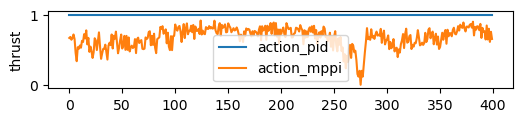

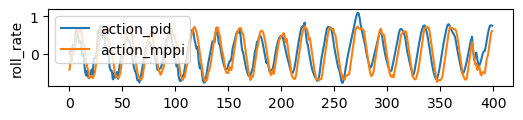

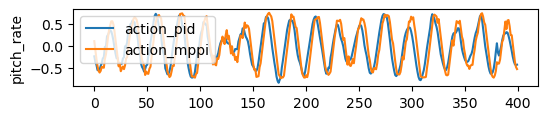

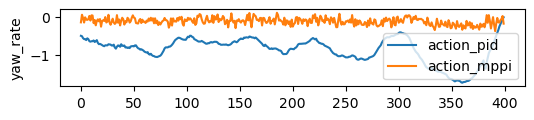

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import rowan

path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/cfctl_1117095220.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data[0].keys(), len(data))

#list-dict to dict-list
# data_dict = {key: np.array([data[i][key] for i in range(len(data))]) for key in data[0].keys()}
data_dict = {}
for key in data[0].keys():
    for i in range(len(data)):
        if key not in data_dict:
            data_dict[key] = []
        try:
            data_dict[key].append(data[i][key])
        except:
            print(key, i)
            data_dict[key].append(np.zeros_like(data_dict[key][-1])+ np.nan)

action_pid = np.array(data_dict['action_pid'])
action_mppi = np.array(data_dict['action_mppi'])
action_applied = np.array(data_dict['action_applied'])
pos = np.array(data_dict['pos'])
pos_tar = np.array(data_dict['pos_tar'])
quat = np.array(data_dict['quat'])
# convert quat (x y z w) to rpy (roll pitch yaw)
rpy = np.zeros((len(quat), 3))
for i in range(len(quat)):
    rpy[i] = rowan.to_euler(quat[i], 'xyz')
vel = np.array(data_dict['vel'])
omega = np.array(data_dict['omega'])

# plot action
# for i, d in enumerate([pos, quat, vel, omega]):
#     plt.figure(figsize=(6, 1))
#     plt.plot(d, label=['pos', 'quat', 'vel', 'omega'][i])
#     plt.legend()
start_step = 7*50
end_step = 15*50
for i in range(4):
    plt.figure(figsize=(6, 1))
    plt.plot(action_pid[start_step:end_step, i], label='action_pid')
    plt.plot(action_mppi[start_step:end_step, i], label='action_mppi')
    plt.ylabel(['thrust', 'roll_rate', 'pitch_rate', 'yaw_rate'][i])
    # plt.plot(action_applied[:, i], label='action_applied')
    plt.legend()
# for i in range(3):
#     plt.figure(figsize=(6, 1))
#     plt.plot(pos[start_step:end_step, i], label='pos')
#     plt.plot(pos_tar[start_step:end_step, i], label='pos_tar')
#     plt.ylabel(['pos_x', 'pos_y', 'pos_z'][i])
#     # plt.ylim([-2, 1])
#     plt.legend()

pos_err = pos - pos_tar
err = np.linalg.norm(pos_err, axis=1)
mean, std = np.mean(err), np.std(err)
print(f"mean: {mean:.3f}, std: {std:.3f}")

In [ ]:
action_mppi[:, 0]/action_pid[:, 0]

In [ ]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os
import seaborn as sns

# load data
data = cfusdlog.decode('/media/pcy/cfSD/log01')['fixedFrequency']
# set seaborn style
sns.set()
# prepare data
start_step = 270
end_step = 850
acc_estimated = np.stack((data['stateEstimate.ax'], data['stateEstimate.ay'], data['stateEstimate.az']), axis=1)
acc_estimated = (acc_estimated + np.array([0.0, 0.0, 1.0])) * 9.81
acc_desired = np.stack((data['ctrltarget.ax'], data['ctrltarget.ay'], data['ctrltarget.az']), axis=1)
acc_estimated = acc_estimated[start_step:end_step, :]
acc_desired = acc_desired[start_step:end_step, :]
# vel_desired = np.stack(data['ctrltarget.vx'], data['ctrltarget.vy'], data['ctrltarget.vz'], axis=1)
# plot
# time = (data['timestamp'] - data['timestamp'][0])/100
# plot pos_estimated and pos_desired
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(acc_estimated[:, i], label='acc_estimated')
    plt.plot(acc_desired[:, i], label='acc_desired')
    plt.legend()

In [ ]:
y = acc_estimated[1:, 2]
x = acc_desired[:-1, 2]

# do linear regression with numpy 
# (y = ax + b)
a, b = np.polyfit(x, y, 1)
# plot
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, a*x+b, color='red')
# show a, b in title
plt.title(f'a={a:.3f}, b={b:.3f}')